In [25]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import math
import openpyxl
from statistics import * 

In [26]:
#User enters data here
file = 'GCData-tdTER_mutants w Conc Data.xlsx' #file name
sheet = 'Corrected Concentration' #sheet with corrected concentration data
samples = ['WT','Neg','I287A'] #name of samples ### Do these have to be in order?
numVials = [3, 3, 3] ### USER INPUT number of vials per sample in order of appearance 

# Check to see if lists samples and numVials are the same length
if len(samples) != len(numVials):
    raise Exception('Length of samples and numVials lists must be the same, hoe!')

chains = ['C4','C6','C8','C10','C12','C14','C16'] #chain lenghts
title = 'TdTER in vivo screening' #graph title
ylabel = 'mg/L FaOH' #y axis label

plt.rcParams["font.family"] = "Times New Roman"



In [27]:
#this function arranges data into an appropriate matrix. correctedConc should be clean with no empty spaces
def dataArrange(correctedConc, numTotSamples):
    numChains = int(len(correctedConc)/numTotSamples)
    correctedConc = np.array(correctedConc)
    rearranged = np.zeros((numTotSamples, numChains))
    iterator = 0;
    for sample in range(0,numTotSamples):
        for chain in range(0, numChains):
            rearranged[sample, chain] = correctedConc[iterator]
            iterator = iterator + 1 
    return rearranged.T, rearranged.T.shape

In [28]:
#Calculates average and standard deviation of data
def calcStats(data):
    stats = [mean(data), stdev(data)]
    return stats

In [29]:
#Returns average and standard deviation data in the form of matricies
def dataParse(rearranged, samples, numVials):
    #rearranged - the rearranged corrected concentration data table with each row corresponding to a chain length
        #and each column corresponding to a sample vial i.e.
        #
        #         H204A-1  H204A-2  H204A-3    WT-1    WT-2    WT-3
        #   C8 [[    #        #        #        #        #        #    ],
        #  C10  [    #        #        #        #        #        #    ],
        #  C12  [    #        #        #        #        #        #    ],
        #  C14  [    #        #        #        #        #        #    ],
        #  C16  [    #        #        #        #        #        #    ]]
        #
    #samples - list of each type of sample i.e. [H204A, WT]
    #numVials - number of vials per sample in order of appearance i.e. [3, 3]
    
    numChains = int(len(rearranged[0])) #number of chain lengths testing for
    avgMat = np.zeros((numChains, len(samples))) #matrix to store average data
    stdevMat = np.zeros((numChains, len(samples))) #matrix to store stdev data

    row_number = range(0,len(chains))
    column_number = range(0,len(samples))

    for r in row_number:
        #print(rearranged[0][r])
        for c in column_number:
            avgMat[r,c] = np.mean(rearranged[0][r][c*3:(c*3)+2]) # rearranged is an array which is set up such that each row contains the concentration for a given chain length for all samples
            stdevMat[r,c] = np.std(rearranged[0][r][c*3:(c*3)+2])
        
    return avgMat,stdevMat

In [30]:
#Creates stacked bar chart of chain length distributions
def createBarChart (file, sheet, samples, numVials, chains, title, ylabel):
    #get concentration data from excel sheet
    concData = getCorrectedConcentration(file,sheet)
    #arrange data into more managable rows and columns
    rearranged = dataArrange(concData, sum(numVials))
    
    #get mean and standard deviation data
    avgMat, stdevMat = dataParse(rearranged, samples, numVials)
    df_avg = pd.DataFrame(avgMat, columns=samples)
    df_std = pd.DataFrame(stdevMat, columns=samples)

    #plot data
    %matplotlib inline
    N = len(samples)
    ind = np.arange(N)
    width = 0.35
    firstMean = df_avg.loc[0,:]
    firstStd = df_std.loc[0,:]
    fistplot = plt.bar(ind, firstMean, width, yerr=firstStd, label=chains[0])
    sumMeans = [0]*len(samples)
    for chain in range(1,len(chains)):
        chainMean = df_avg.loc[chain,:]
        prevChainMean = df_avg.loc[chain-1,:]
        for i in range(len(sumMeans)):
            sumMeans[i] = sumMeans[i] + prevChainMean[i]
        chainStd = df_std.loc[chain,:]
        plt.bar(ind, chainMean, width, bottom=sumMeans, yerr=chainStd, label=chains[chain])
    plt.xticks(ind,samples)
    plt.legend()
    plt.suptitle(title)
    plt.ylabel(ylabel)
    plt.show

In [31]:
#returns clean list of corrected concentrations from an excel file
def getCorrectedConcentration (file, sheet):
    wb = openpyxl.load_workbook(file)
    df = pd.read_excel(file, sheet_name=sheet)
    #print(df)
    correctedConc = []
    for i in df.index:
        conc = df['Corrected Concentration'][i]
        if isinstance(conc, float) and not math.isnan(conc): #math.isnan returns True if conc is nan
            correctedConc.append(conc)
            
            #print(correctedConc)
    return correctedConc

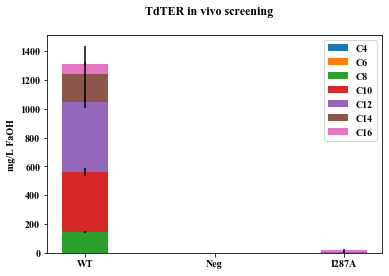

In [32]:
createBarChart(file, sheet, samples, numVials, chains, title, ylabel)

In [358]:
rearranged[0]

array([[   1.67049171,    1.53894258,    4.15420045,  112.83577184,
         107.19640796,  110.67282071,   15.85106094,   23.61141136,
          25.50998567,    9.11570333,    8.83495209,    9.2003191 ],
       [   0.84959623,    0.84954965,    0.87813229,   20.59594407,
          15.58935111,   18.81021535,    6.71367671,   13.21366716,
          13.18094301,    8.57661202,    8.62765435,    9.22487511],
       [   1.39151337,    1.24843537,    1.68249437,  106.68924054,
          71.63576289,   91.55541314,  350.54535531,  358.31358574,
         323.67174791,  430.39610461,  412.98248274,  432.88707739],
       [   2.57723174,    0.        ,    2.16589698,  119.98241821,
          75.29643629,  100.052131  ,   19.87433762,    0.52410207,
         339.52465146,   23.91321352,    3.68128396,   21.61274348],
       [   6.94144444,    7.48636412,   12.58737466,   22.06740554,
          19.1557307 ,   33.27648634,    7.92029316,    5.01143647,
           4.21639661,    3.54451291,    2.6